In [565]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [566]:
df=pd.read_csv('train.csv')
test_set=pd.read_csv('test.csv')

In [567]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [568]:
test_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Checking for all Categorical Values

In [570]:
cat=[]
for col in df.columns:
    print(col)
    ds=df[col].unique().shape
    print(ds[0])
    cat.append((col,ds[0]))
    print('-------')

PassengerId
8693
-------
HomePlanet
4
-------
CryoSleep
3
-------
Cabin
6561
-------
Destination
4
-------
Age
81
-------
VIP
3
-------
RoomService
1274
-------
FoodCourt
1508
-------
ShoppingMall
1116
-------
Spa
1328
-------
VRDeck
1307
-------
Name
8474
-------
Transported
2
-------


In [571]:
print(cat)

[('PassengerId', 8693), ('HomePlanet', 4), ('CryoSleep', 3), ('Cabin', 6561), ('Destination', 4), ('Age', 81), ('VIP', 3), ('RoomService', 1274), ('FoodCourt', 1508), ('ShoppingMall', 1116), ('Spa', 1328), ('VRDeck', 1307), ('Name', 8474), ('Transported', 2)]


In [572]:
category=[]
for i in cat:
    if i[0]=='Transported':
        continue
    if i[1]<6:
        category.append(i[0])
category        

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [573]:
df[category] = df[category].astype('category')
df['Transported']= df['Transported'].astype('object')

In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   category
 2   CryoSleep     8476 non-null   category
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   category
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   category
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   object  
dtypes: category(4), float64(6), object(4)
memory usage: 713.6+ KB


In [575]:
to_drop=['PassengerId','Cabin','Name']
df=df.drop(to_drop,axis=1)

In [576]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [577]:
df.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

Substituing Mean values for every Continuous Feature

In [578]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['RoomService']=df['RoomService'].fillna(df['RoomService'].mean())
df['FoodCourt']=df['FoodCourt'].fillna(df['FoodCourt'].mean())
df['ShoppingMall']=df['ShoppingMall'].fillna(df['ShoppingMall'].mean())
df['Spa']=df['Spa'].fillna(df['Spa'].mean())
df['VRDeck']=df['VRDeck'].fillna(df['VRDeck'].mean())

In [579]:
df.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [580]:
df=df.dropna()

In [581]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [582]:
df['Transported']=pd.get_dummies(df['Transported'],drop_first=True)

In [583]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0


In [584]:
y=df['Transported']
df=df.drop('Transported',axis=1)

In [585]:
categorical_columns=['HomePlanet','CryoSleep','Destination','VIP']
cat_col=df[categorical_columns]
df=df.drop(categorical_columns,axis=1)

Encoding using Get Dummies

In [586]:
cat_col=pd.get_dummies(cat_col,drop_first=True)

In [587]:
cat_col

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,1,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,1,1
3,1,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
8688,1,0,0,0,0,1
8689,0,0,1,1,0,0
8690,0,0,0,0,1,0
8691,1,0,0,0,0,0


In [588]:
df_new = pd.concat([df, cat_col], axis=1)

In [589]:
df_new

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,0,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,0,1,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,1,0,0,0,0,1
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,0,0,0,0,1,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,1,0,0,0,0,0


In [590]:
from sklearn.preprocessing import scale
X_scaled=scale(df_new)

In [591]:
X_scaled

array([[ 0.70804952, -0.34069727, -0.28750529, ..., -0.32167113,
         0.66513069, -0.1564263 ],
       [-0.33766786, -0.17493662, -0.28195006, ..., -0.32167113,
         0.66513069, -0.1564263 ],
       [ 2.03262485, -0.27530545,  1.91977188, ..., -0.32167113,
         0.66513069,  6.39278694],
       ...,
       [-0.19823887, -0.34069727, -0.28750529, ..., -0.32167113,
         0.66513069, -0.1564263 ],
       [ 0.22004808, -0.34069727,  0.35998737, ..., -0.32167113,
        -1.50346393, -0.1564263 ],
       [ 1.05662197, -0.14908404,  2.60615113, ..., -0.32167113,
         0.66513069, -0.1564263 ]])

In [592]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 7913, dtype: uint8

In [593]:
test_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [594]:
test_set.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Removing PassengerID, Cabin, Name as these features don't help the model 

In [595]:
to_drop=['PassengerId','Cabin','Name']
test=test_set.drop(to_drop,axis=1)

In [596]:
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


In [597]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test['RoomService']=test['RoomService'].fillna(test['RoomService'].mean())
test['FoodCourt']=test['FoodCourt'].fillna(test['FoodCourt'].mean())
test['ShoppingMall']=test['ShoppingMall'].fillna(test['ShoppingMall'].mean())
test['Spa']=test['Spa'].fillna(test['Spa'].mean())
test['VRDeck']=test['VRDeck'].fillna(test['VRDeck'].mean())

In [598]:
test.isna().sum()

HomePlanet      87
CryoSleep       93
Destination     92
Age              0
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
dtype: int64

In [599]:
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0
4273,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0
4274,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0
4275,Europa,False,NaN,28.658146,False,0.0,2680.0,0.0,0.0,523.0


In [600]:
cat_col=test[categorical_columns]
test=test.drop(categorical_columns,axis=1)

In [601]:
cat_col=pd.get_dummies(cat_col,drop_first=True)

In [602]:
cat_col

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0,0,1,0,1,0
1,0,0,0,0,1,0
2,1,0,1,0,0,0
3,1,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
4272,0,0,1,0,1,0
4273,0,0,0,0,1,0
4274,0,1,1,0,0,0
4275,1,0,0,0,0,0


In [603]:
test_new = pd.concat([test, cat_col], axis=1)

In [604]:
test_new

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,27.000000,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
1,19.000000,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,1,0
2,31.000000,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
3,38.000000,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,1,0
4,20.000000,10.0,0.0,635.0,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.000000,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
4273,42.000000,0.0,847.0,17.0,10.0,144.0,0,0,0,0,1,0
4274,28.658146,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0
4275,28.658146,0.0,2680.0,0.0,0.0,523.0,1,0,0,0,0,0


In [605]:
test=scale(test_new)

In [606]:
test

array([[-1.18221624e-01, -3.64779540e-01, -2.91351586e-01, ...,
        -3.15861644e-01,  6.68496586e-01, -1.32689380e-01],
       [-6.88601357e-01, -3.64779540e-01, -2.85385128e-01, ...,
        -3.15861644e-01,  6.68496586e-01, -1.32689380e-01],
       [ 1.66968243e-01, -3.64779540e-01, -2.91351586e-01, ...,
        -3.15861644e-01, -1.49589395e+00, -1.32689380e-01],
       ...,
       [-2.53299485e-16, -3.64779540e-01, -2.91351586e-01, ...,
        -3.15861644e-01, -1.49589395e+00, -1.32689380e-01],
       [-2.53299485e-16, -3.64779540e-01,  1.48532680e+00, ...,
        -3.15861644e-01, -1.49589395e+00, -1.32689380e-01],
       [ 1.02253784e+00, -3.64779540e-01, -2.91351586e-01, ...,
         3.16594313e+00, -1.49589395e+00, -1.32689380e-01]])

# Logistic Regression and CART

In [607]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
lr=LogisticRegression()
dt=DecisionTreeClassifier(max_depth=10)
classifiers=[('Logistic Regression',lr),('CART',dt)]

In [608]:
for clf_name,clf in classifiers:
    clf.fit(X_scaled,y)
    y_pred=clf.predict(X_scaled)
    print(f'Train Accuracy:{clf.score(X_scaled,y)}')


Train Accuracy:0.7871856438771642
Train Accuracy:0.8307847845317832


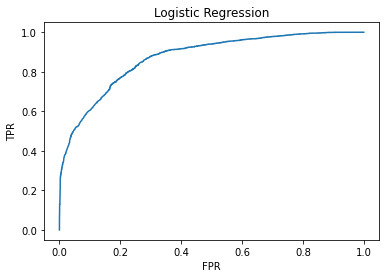

AUC SCORE:0.8725243544606561


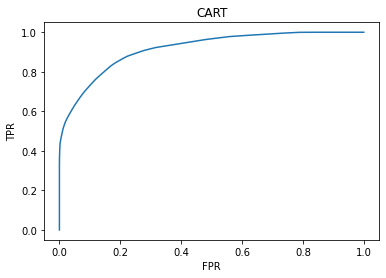

AUC SCORE:0.9157164769609263


In [609]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
for clf_name,clf in classifiers:
    y_pred_proba=clf.predict_proba(X_scaled)[:,1]
    fpr,tpr,thresholds=roc_curve(y,y_pred_proba)
    plt.plot(fpr,tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(clf_name)
    plt.show()
    print(f'AUC SCORE:{roc_auc_score(y,y_pred_proba)}')
#     print(f'F1 Score: {f1_score(y, y_pred)}')

# Voting Classifier

In [610]:
vc=VotingClassifier(estimators=classifiers,voting='soft')
vc.fit(X_scaled,y)
y_pred=vc.predict(X_scaled)
print(f'Train Accuracy:{vc.score(X_scaled,y)}')

Train Accuracy:0.8274990521925945


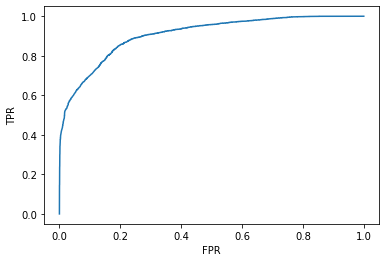

In [611]:
from sklearn.metrics import roc_curve
y_pred_proba=vc.predict_proba(X_scaled)[:,1]
fpr,tpr,thresholds=roc_curve(y,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [612]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y,y_pred_proba)

0.9068349965725836

In [613]:
f1_score(y, y_pred)

0.8328230251071648

# Bagging

In [614]:
from sklearn.ensemble import BaggingClassifier
dt=DecisionTreeClassifier()
bc=BaggingClassifier(base_estimator=dt,n_estimators=300,n_jobs=-1)
bc.fit(X_scaled,y)
y_pred=bc.predict(X_scaled)
print(bc.score(X_scaled,y))

0.9366864653102489


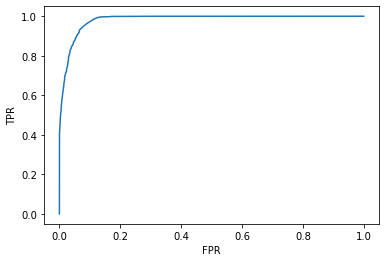

In [615]:
from sklearn.metrics import roc_curve
y_pred_proba=bc.predict_proba(X_scaled)[:,1]
fpr,tpr,thresholds=roc_curve(y,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [616]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y,y_pred_proba)

0.982150571225418

In [617]:
f1_score(y, y_pred)

0.9393829401088929

# Random Forest

In [618]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=80,n_jobs=-1)
rf.fit(X_scaled,y)
y_pred=rf.predict(X_scaled)
print(rf.score(X_scaled,y))

0.936560090989511


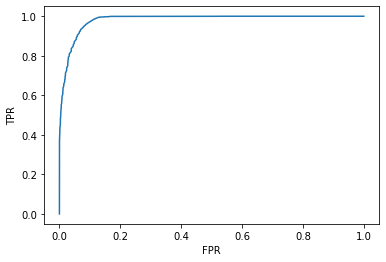

In [619]:
from sklearn.metrics import roc_curve
y_pred_proba=rf.predict_proba(X_scaled)[:,1]
fpr,tpr,thresholds=roc_curve(y,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [620]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y,y_pred_proba)

0.9817564662538435

In [621]:
f1_score(y, y_pred)

0.9391367604267701

# AdaBoostClassifier

In [622]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(base_estimator=dt)
ad.fit(X_scaled,y)
y_pred=ad.predict(X_scaled)
print(ad.score(X_scaled,y))

0.9366864653102489


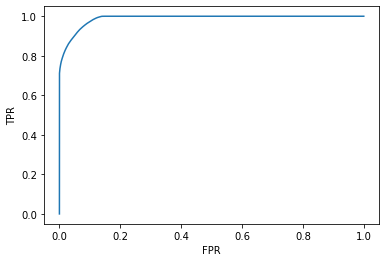

In [623]:
from sklearn.metrics import roc_curve
y_pred_proba=ad.predict_proba(X_scaled)[:,1]
fpr,tpr,thresholds=roc_curve(y,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [624]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y,y_pred_proba)


0.9885062086386226

In [625]:
f1_score(y, y_pred)

0.9387605427209389

# GradientBoosting

In [626]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=300,max_depth=100)
gbc.fit(X_scaled,y)
y_pred=gbc.predict(X_scaled)
print(gbc.score(X_scaled,y))

0.9366864653102489


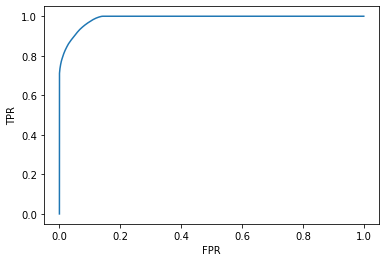

In [627]:
from sklearn.metrics import roc_curve
y_pred_proba=gbc.predict_proba(X_scaled)[:,1]
fpr,tpr,thresholds=roc_curve(y,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [628]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y,y_pred_proba)


0.9885062086386226

In [629]:
f1_score(y, y_pred)

0.9397329483940816

Using Gradient Boosting to predict the transported passengers

In [630]:
final_pred=gbc.predict(test)

In [634]:
a=test_set[['PassengerId']]
a

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [635]:
a['Transported']=final_pred

<ipython-input-635-70cf39fa8e63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Transported']=final_pred


In [638]:
change={0:'False',1:'True'}
a['Transported']=a['Transported'].replace(change)

<ipython-input-638-cbdf10817c3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Transported']=a['Transported'].replace(change)


In [641]:
a.to_csv('submission.csv', index=False)